In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     int64 
 2   temp      14 non-null     int64 
 3   humidity  14 non-null     int64 
 4   wind      14 non-null     int64 
 5   play      14 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 804.0+ bytes


In [16]:
from sklearn.preprocessing import LabelEncoder 
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

df['outlook'] = le_outlook.fit_transform(df['outlook'])
df['temp'] = le_temp.fit_transform(df['temp'])
df['humidity'] = le_humidity.fit_transform(df['humidity'])
df['wind'] = le_wind.fit_transform(df['wind'])
df['play'] = le_play.fit_transform(df['play'])


print(df['outlook'].unique())
for i, label in enumerate(le_outlook.classes_):
    print(f"{i} = {label}")
print(df['temp'].unique())
for i, label in enumerate(le_temp.classes_):
    print(f"{i} = {label}")
    print(df['humidity'].unique())
for i, label in enumerate(le_humidity.classes_):
    print(f"{i} = {label}")
    print(df['wind'].unique())
for i, label in enumerate(le_wind.classes_):
    print(f"{i} = {label}")
    print(df['play'].unique())
for i, label in enumerate(le_play.classes_):
    print(f"{i} = {label}")

[2 0 1]
0 = 0
1 = 1
2 = 2
[1 2 0]
0 = 0
[0 1]
1 = 1
[0 1]
2 = 2
[0 1]
0 = 0
[1 0]
1 = 1
[1 0]
0 = 0
[0 1]
1 = 1
[0 1]
0 = 0
1 = 1


In [17]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [18]:
x = df[['outlook', 'temp', 'humidity', 'wind']]
y = df['play']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

<function matplotlib.pyplot.show(close=None, block=None)>

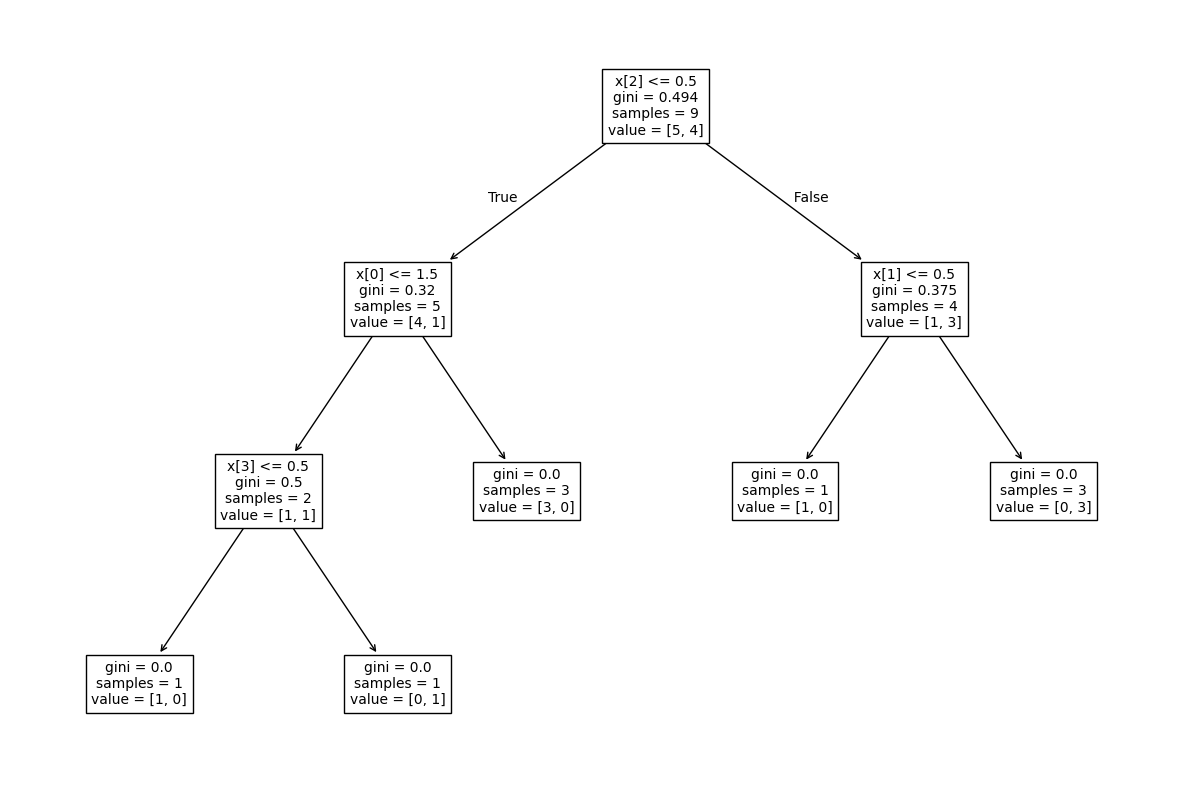

In [26]:
from sklearn import tree
plt.subplots(figsize = (15,10)) # 15 panjang, 10 lebar
tree.plot_tree(classifier, fontsize = 10) # ukuran huruf
plt.show

In [27]:
depth = classifier.get_depth()
depth

3

In [28]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
akurasi = accuracy_score(y_test, y_pred)
akurasi

0.2